In [28]:
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [29]:
path = "../datasets/the-movie-datasets"
path = Path(path)

files = list(path.glob('*'))
print("Files found:")
for i, file in enumerate(files):
    print(f"{i}. {file.name}")

Files found:
0. links_small.csv
1. links.csv
2. credits.csv
3. movies_metadata.csv
4. ratings.csv
5. ratings_small.csv
6. keywords.csv


In [30]:
df_meta_data = pd.read_csv(files[3])
print(df_meta_data.columns)
df_meta = df_meta_data.filter(['id','original_title','genres','budget','revenue','vote_average','vote_count'])

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


/var/folders/7_/6rnw1yrs7p923fzd_64549v00000gn/T/ipykernel_1166/2652762781.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta_data = pd.read_csv(files[3])


In [31]:
df_meta

,id,original_title,genres,budget,revenue,vote_average,vote_count
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000,373554033.0,7.7,5415.0
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000,262797249.0,6.9,2413.0
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0,0.0,6.5,92.0
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000,81452156.0,6.1,34.0
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",0,76578911.0,5.7,173.0
...,...,...,...,...,...,...,...
45461,439050,رگ خواب,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",0,0.0,4.0,1.0
45462,111109,Siglo ng Pagluluwal,"[{'id': 18, 'name': 'Drama'}]",0,0.0,9.0,3.0
45463,67758,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",0,0.0,3.8,6.0
45464,227506,Satana likuyushchiy,[],0,0.0,0.0,0.0


In [32]:
df_meta.genres = df_meta.genres.apply(eval).apply(lambda x: [genre['name'] for genre in x] if x else pd.NA)
df_meta.genres.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45466 entries, 0 to 45465
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
43024 non-null  object
dtypes: object(1)
memory usage: 355.3+ KB


In [33]:
df_meta = df_meta.dropna(subset=['genres'])
df_meta.genres.info()

<class 'pandas.core.series.Series'>
Index: 43024 entries, 0 to 45463
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
43024 non-null  object
dtypes: object(1)
memory usage: 672.2+ KB


In [34]:
df_meta = df_meta.drop(df_meta[(df_meta.revenue == 0) ].index)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7391 entries, 0 to 45422
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              7391 non-null   object 
 1   original_title  7391 non-null   object 
 2   genres          7391 non-null   object 
 3   budget          7391 non-null   object 
 4   revenue         7385 non-null   float64
 5   vote_average    7385 non-null   float64
 6   vote_count      7385 non-null   float64
dtypes: float64(3), object(4)
memory usage: 461.9+ KB


/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sirisuk/anaconda3/envs/ds/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: G

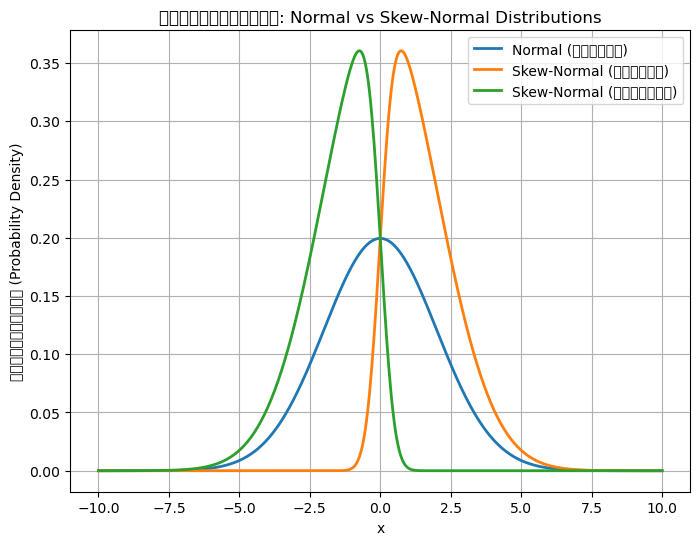

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skewnorm

# สร้างช่วงของค่า x
x = np.linspace(-10, 10, 500)

# สร้างกราฟของการกระจายแบบ Normal (สมมาตร)
y_normal = norm.pdf(x, loc=0, scale=2)

# สร้างกราฟของการกระจายแบบ Skew-Normal
# skewnorm กับ a > 0: เบ้ขวา, a < 0: เบ้ซ้าย
y_skew_right = skewnorm.pdf(x, a=5, loc=0, scale=2)   # เบ้ไปทางขวา
y_skew_left = skewnorm.pdf(x, a=-5, loc=0, scale=2)     # เบ้ไปทางซ้าย

# วาดกราฟ
plt.figure(figsize=(8, 6))
plt.plot(x, y_normal, label='Normal (สมมาตร)', lw=2)
plt.plot(x, y_skew_right, label='Skew-Normal (เบ้ขวา)', lw=2)
plt.plot(x, y_skew_left, label='Skew-Normal (เบ้ซ้าย)', lw=2)
plt.title('ตัวอย่างกราฟ: Normal vs Skew-Normal Distributions')
plt.xlabel('x')
plt.ylabel('ความหนาแน่น (Probability Density)')
plt.legend()
plt.grid(True)
plt.show()